<a href="https://colab.research.google.com/github/paolaCaushi/anomalyDetection/blob/genaralAnomalyDetectionKMeans/generalADKmeansIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Anomaly Detection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 
         idAnomalia                   dataAnomalia     latitudine  \
count  1.734240e+05                         173424  173424.000000   
mean   3.637260e+07  2021-11-16 15:23:07.766422016  437852.752335   
min    1.852638e+07            2021-01-01 00:00:10  358624.000000   
25%    3.600256e+07  2021-01-18 14:55:49.750000128  427888.250000   
50%    3.609496e+07            2021-02-01 17:37:46  443801.000000   
75%    3.672610e+07            2022-08-26 05:41:41  453089.000000   
max    3.747886e+07            2025-08-01 19:52:53  744896.000000   
std    5.388040e+05                            NaN   19974.080615   

         longitudine                 dataCoordinate  \
count  173424.000000                         173424   
mean   108994.602829  2021-11-16 15:23:07.766422016   
min     59905.000000            2021-01-01 00:00:10   
25%     89963.000000  2021-01-18 14:55:49.750000128   
50%    103139.000000            2021-02-01 17:37:46   
75%    125368.000000            2022

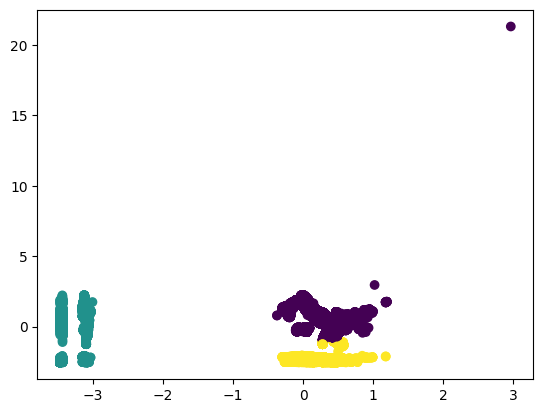

In [5]:
##  Here finding anomalies genearally not specific product theft

import pandas as pd
from sklearn import model_selection
from sklearn.impute import SimpleImputer #
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from sklearn.base import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Specify the path to the Excel file
data_file = "Anomalie_2021_2024.xlsx"
# Read data from Excel into a DataFrame
df = pd.read_excel(data_file, sheet_name="Sheet1", header=0)

df["latitudine"] = df["latitudine"].str.replace(",", "")
df["longitudine"] = df["longitudine"].str.replace(",", "")

imputer = SimpleImputer(strategy = 'mean')
df[['latitudine', 'longitudine']] = imputer.fit_transform(df[['latitudine', 'longitudine']])
#df[["latitudine", "longitudine"]] = df[["latitudine", "longitudine"]].astype(float)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[["latitudine", "longitudine"]])  # Assuming these are numerical
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)
df["cluster"] = kmeans.labels_
for i in range(k):
  print(f"Cluster {i}: ")
  print(df[df["cluster"] == i].describe())
  # Visualize clusters (optional)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_)  # Assuming data_scaled has latitudine and longitudine
plt.show()
#df.head()

# **kMeans Cluesting and visualizations of Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


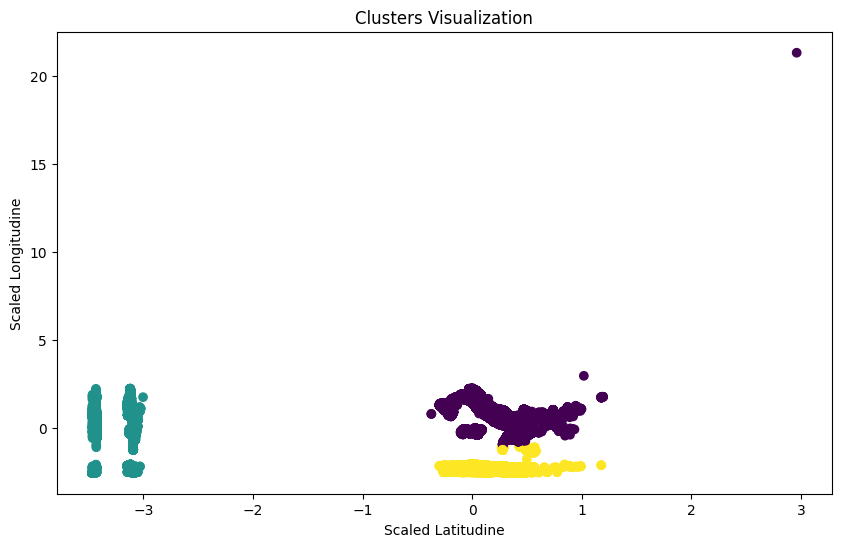

In [6]:
import pandas as pd
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Read data from Excel into a DataFrame
data_file = "Anomalie_2021_2024.xlsx"
df = pd.read_excel(data_file, sheet_name="Sheet1", header=0)

# Data cleaning
df["latitudine"] = df["latitudine"].str.replace(",", "").astype(float)
df["longitudine"] = df["longitudine"].str.replace(",", "").astype(float)

# Imputation
imputer = SimpleImputer(strategy='mean')
df[['latitudine', 'longitudine']] = imputer.fit_transform(df[['latitudine', 'longitudine']])

# Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[["latitudine", "longitudine"]])

# KMeans Clustering
k = 3
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Scaled Latitudine')
plt.ylabel('Scaled Longitudine')
plt.show()


# **Evaluate and Visualize**

Cluster Centers:  [[ 0.31150373  0.2835144 ]
 [-3.12430961  0.06032771]
 [ 0.30855384 -2.27744962]]
Silhouette Score: 0.7284326746186626


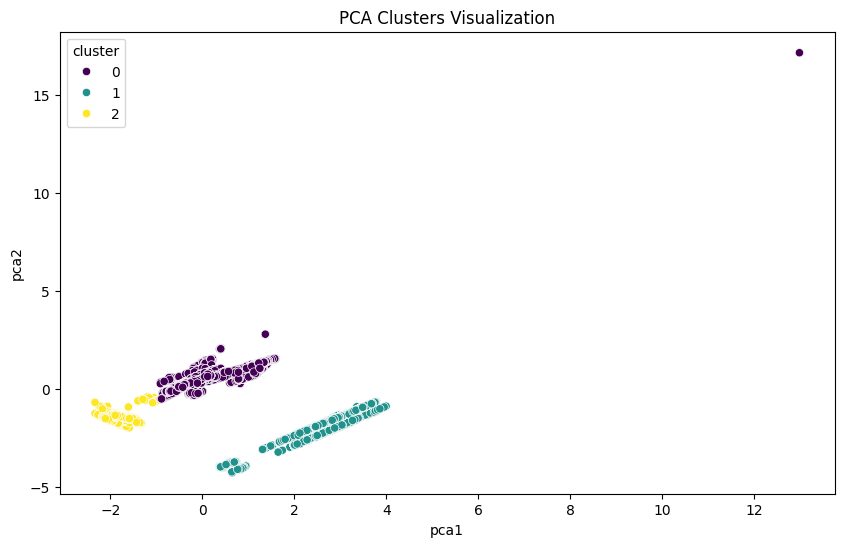

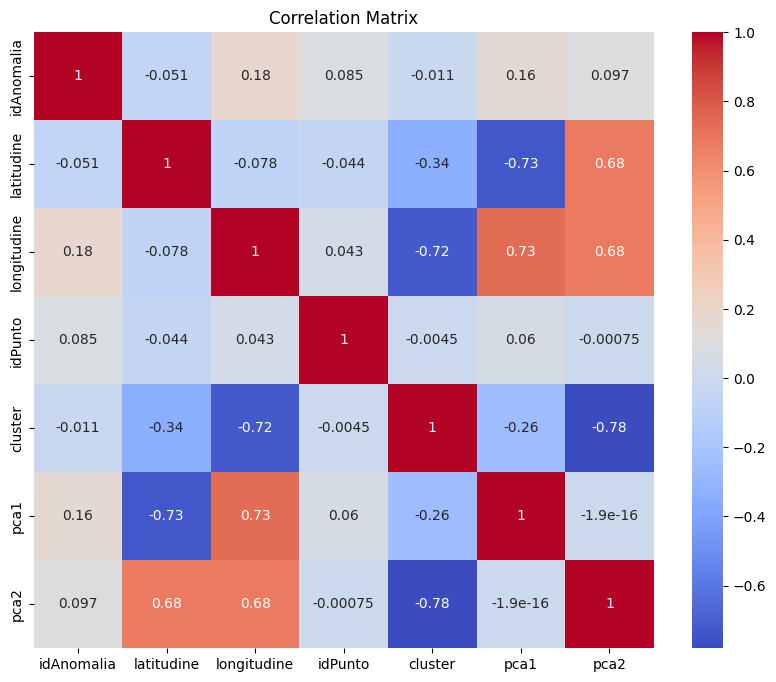

Cluster 0:
         idAnomalia                   dataAnomalia     latitudine  \
count  1.734240e+05                         173424  173424.000000   
mean   3.637260e+07  2021-11-16 15:23:07.766422016  437852.752335   
min    1.852638e+07            2021-01-01 00:00:10  358624.000000   
25%    3.600256e+07  2021-01-18 14:55:49.750000128  427888.250000   
50%    3.609496e+07            2021-02-01 17:37:46  443801.000000   
75%    3.672610e+07            2022-08-26 05:41:41  453089.000000   
max    3.747886e+07            2025-08-01 19:52:53  744896.000000   
std    5.388040e+05                            NaN   19974.080615   

         longitudine                 dataCoordinate  \
count  173424.000000                         173424   
mean   108994.602829  2021-11-16 15:23:07.766422016   
min     59905.000000            2021-01-01 00:00:10   
25%     89963.000000  2021-01-18 14:55:49.750000128   
50%    103139.000000            2021-02-01 17:37:46   
75%    125368.000000            2022-

In [9]:
# Cluster Centers
print("Cluster Centers: ", kmeans.cluster_centers_)

# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['pca1'] = data_pca[:, 0]
df['pca2'] = data_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('PCA Clusters Visualization')
plt.show()


# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Additional Profiling per Cluster
for i in range(k):
    print(f"Cluster {i}:")
    cluster_data = df[df['cluster'] == i]
    print(cluster_data.describe())


# **Anomaly Detection using Isolation Forest**

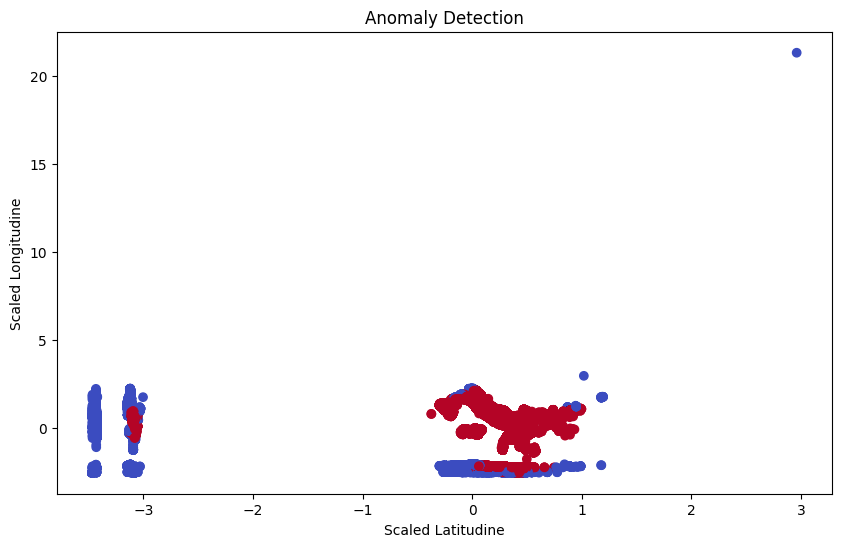

In [10]:
# Anomaly Detection using Isolation Forest

import pandas as pd
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import numpy as np

iso_forest = IsolationForest(contamination=0.05)
df['anomaly'] = iso_forest.fit_predict(data_scaled)
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection')
plt.xlabel('Scaled Latitudine')
plt.ylabel('Scaled Longitudine')
plt.show()

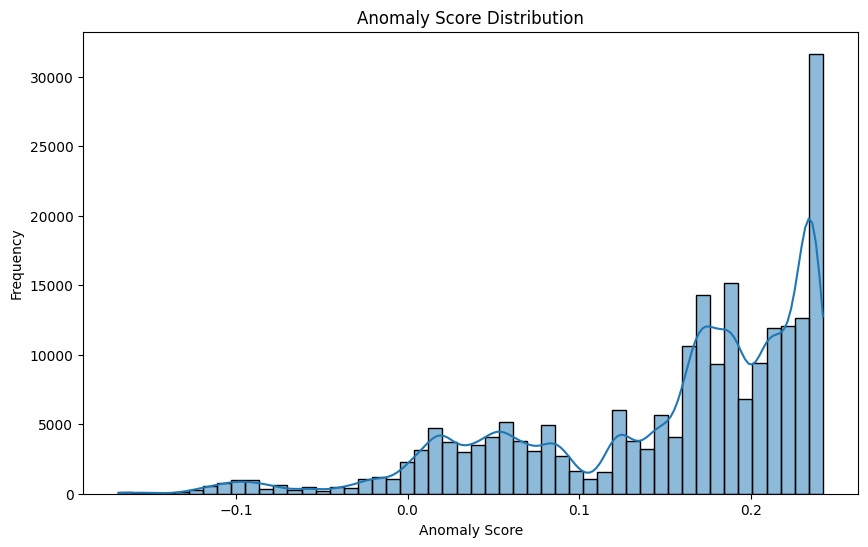

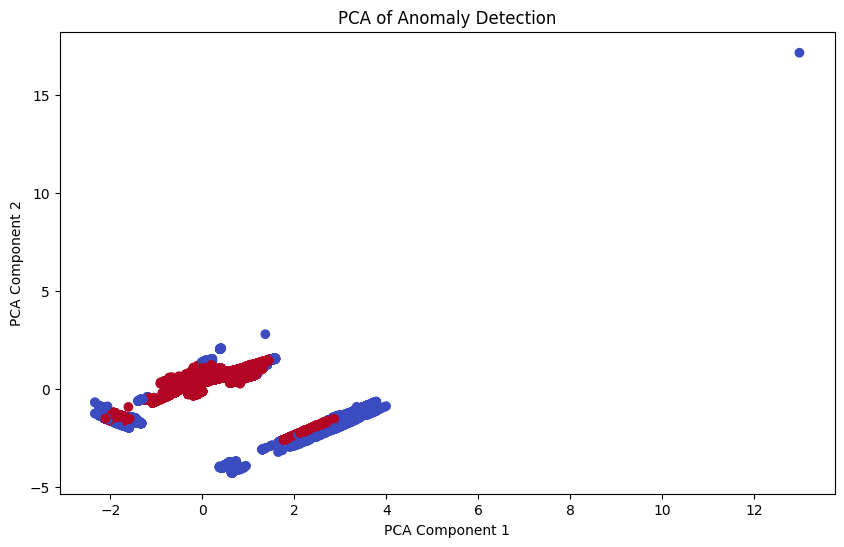

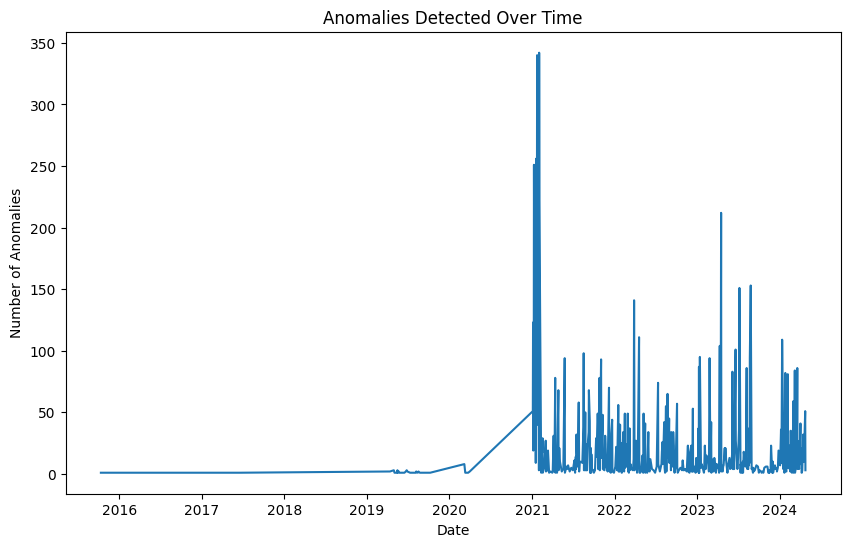

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load and preprocess your data
# df = pd.read_excel('path_to_file.xlsx')
# data_scaled = StandardScaler().fit_transform(df[['feature1', 'feature2', ...]])

iso_forest = IsolationForest(contamination=0.05)
df['anomaly'] = iso_forest.fit_predict(data_scaled)
df['anomaly_score'] = iso_forest.decision_function(data_scaled)
anomalies = df[df['anomaly'] == -1]

# Anomaly Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['anomaly_score'], bins=50, kde=True)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# PCA Plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['anomaly'], cmap='coolwarm')
plt.title('PCA of Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



# Time Series Analysis (if applicable)
df['timestamp'] = pd.to_datetime(df['dataSegnalazione'])
anomalies_over_time = df[df['anomaly'] == -1].groupby(df['timestamp'].dt.date).size()
plt.figure(figsize=(10, 6))
anomalies_over_time.plot()
plt.title('Anomalies Detected Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.show()


# **Localising the outlier**

In [19]:
# Locate the outlier
outlier_coordinate = np.array([3, 20])
distance = np.linalg.norm(data_scaled - outlier_coordinate, axis=1)
outlier_index = np.argmin(distance)

outlier_data = df.iloc[outlier_index]
print("Outlier Data:")
print(outlier_data)

Outlier Data:
idAnomalia                            36449171
idConcentratore                       SR010563
dataAnomalia               2022-01-05 06:57:38
latitudine                            744896.0
longitudine                           918517.0
dataCoordinate             2022-01-05 06:57:38
dataSegnalazione    2022-01-08 19:37:12.330000
note                                        2B
idPunto                                    NaN
cluster                                      0
pca1                                 12.981239
pca2                                 17.170414
anomaly                                     -1
anomaly_score                        -0.082417
timestamp           2022-01-08 19:37:12.330000
Name: 140627, dtype: object
